In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
wind = ctrl.Antecedent(np.arange(0, 21, 1), 'wind')
pollution = ctrl.Consequent(np.arange(0, 101, 1), 'pollution')

In [ ]:
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['mid'] = fuzz.trimf(temperature.universe, [10, 25, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

In [ ]:
traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 40])
traffic['mid'] = fuzz.trimf(traffic.universe, [30, 50, 70])
traffic['high'] = fuzz.trimf(traffic.universe, [60, 100, 100])

In [ ]:
wind['slow'] = fuzz.trimf(wind.universe, [0, 0, 5])
wind['mid'] = fuzz.trimf(wind.universe, [4, 10, 16])
wind['fast'] = fuzz.trimf(wind.universe, [15, 20, 20])

In [ ]:
pollution['low'] = fuzz.trapmf(pollution.universe, [0, 0, 30, 50])
pollution['mid'] = fuzz.trapmf(pollution.universe, [30, 50, 60, 80])
pollution['high'] = fuzz.trapmf(pollution.universe, [60, 80, 100, 100])

In [ ]:
rules = [ctrl.Rule(traffic['low'] & wind['slow'] & temperature['cold'], pollution['low']),
ctrl.Rule(traffic['low'] & wind['slow'] & temperature['mid'], pollution['low']),
ctrl.Rule(traffic['low'] & wind['slow'] & temperature['hot'], pollution['mid']),
ctrl.Rule(traffic['low'] & wind['mid'] & temperature['cold'], pollution['low']),
ctrl.Rule(traffic['low'] & wind['mid'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['low'] & wind['mid'] & temperature['hot'], pollution['mid']),
ctrl.Rule(traffic['low'] & wind['fast'] & temperature['cold'], pollution['low']),
ctrl.Rule(traffic['low'] & wind['fast'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['low'] & wind['fast'] & temperature['hot'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['slow'] & temperature['cold'], pollution['low']),
ctrl.Rule(traffic['mid'] & wind['slow'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['slow'] & temperature['hot'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['mid'] & temperature['cold'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['mid'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['mid'] & temperature['hot'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['fast'] & temperature['cold'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['fast'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['mid'] & wind['fast'] & temperature['hot'], pollution['high']),
ctrl.Rule(traffic['high'] & wind['slow'] & temperature['cold'], pollution['mid']),
ctrl.Rule(traffic['high'] & wind['slow'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['high'] & wind['slow'] & temperature['hot'], pollution['mid']),
ctrl.Rule(traffic['high'] & wind['mid'] & temperature['cold'], pollution['mid']),
ctrl.Rule(traffic['high'] & wind['mid'] & temperature['mid'], pollution['mid']),
ctrl.Rule(traffic['high'] & wind['mid'] & temperature['hot'], pollution['high']),
ctrl.Rule(traffic['high'] & wind['fast'] & temperature['cold'], pollution['mid']),
ctrl.Rule(traffic['high'] & wind['fast'] & temperature['mid'], pollution['high']),
ctrl.Rule(traffic['high'] & wind['fast'] & temperature['hot'], pollution['high'])
        ]

In [ ]:
pollution_ctrl = ctrl.ControlSystem(rules)
pollution_sim = ctrl.ControlSystemSimulation(pollution_ctrl)

In [ ]:
temp_input = float(input('temp:'))
traffic_input = float(input('traffic'))
wind_input = float(input('wind'))

temp:35
traffic68
wind12


In [ ]:
pollution_sim.input['temperature'] = temp_input
pollution_sim.input['traffic'] = traffic_input
pollution_sim.input['wind'] = wind_input

In [ ]:
pollution_sim.compute()

In [ ]:
poll_value = pollution_sim.output['pollution']

low_deg = fuzz.interp_membership(pollution.universe, pollution['low'].mf, poll_value)
mid_deg = fuzz.interp_membership(pollution.universe, pollution['mid'].mf, poll_value)
high_deg = fuzz.interp_membership(pollution.universe, pollution['high'].mf, poll_value)

total = low_deg + mid_deg + high_deg
low_percent = (low_deg / total) * 100
mid_percent = (mid_deg / total) * 100
high_percent = (high_deg / total) * 100

print("\nنتایج تحلیل آلودگی هوا:")
print(f"مقدار عددی آلودگی: {poll_value:.2f}")
print(f"درصد تعلق به دسته 'کم': {low_percent:.2f}%")
print(f"درصد تعلق به دسته 'متوسط': {mid_percent:.2f}%")
print(f"درصد تعلق به دسته 'زیاد': {high_percent:.2f}%")


نتایج تحلیل آلودگی هوا:
مقدار عددی آلودگی: 71.08
درصد تعلق به دسته 'کم': 0.00%
درصد تعلق به دسته 'متوسط': 44.59%
درصد تعلق به دسته 'زیاد': 55.41%


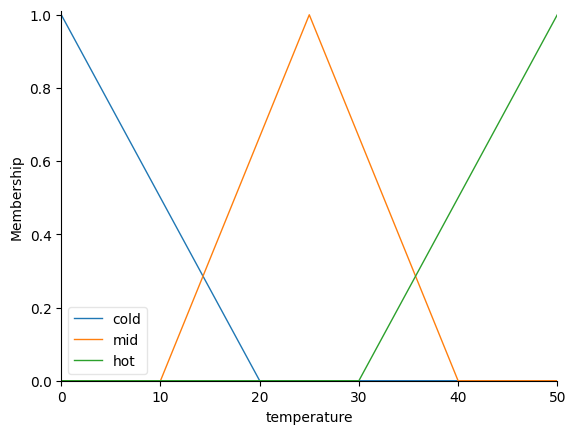

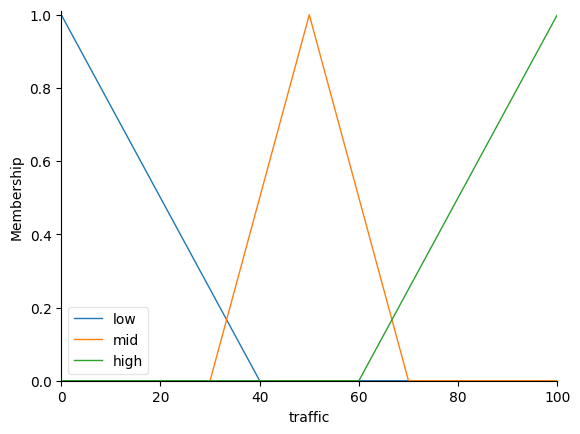

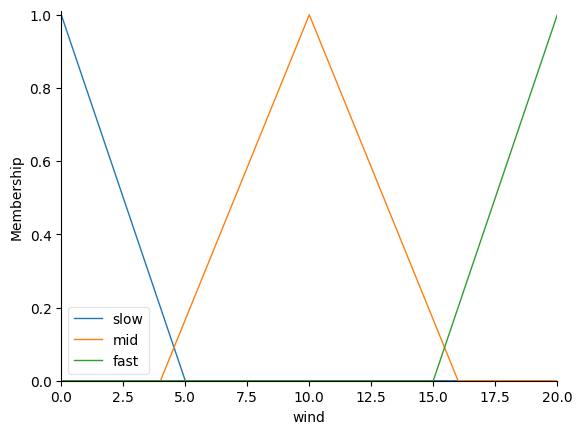

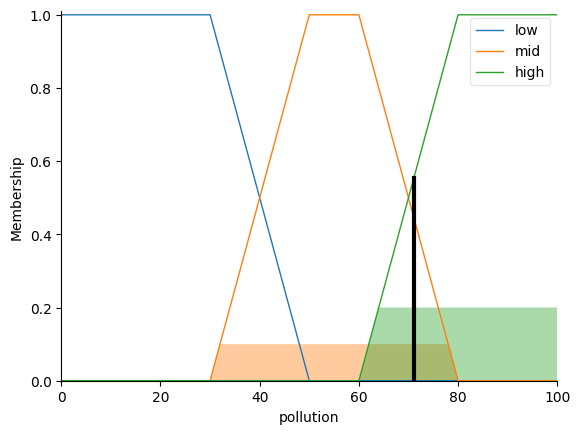

In [ ]:
temperature.view()
traffic.view()
wind.view()
pollution.view(sim=pollution_sim)